This code should work for pd GH3

In [1]:
import gc
import os
import time
import logging
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta
from trino.dbapi import connect
from pathlib import Path

In [13]:
# SQL engine class
class TrinoEngine():
    def __init__(self):
        conn = connect(
            host="localhost",
            port=9090,
            catalog="cuebiq"
        )
        self.cur = conn.cursor()
        self.engine = create_engine("trino://localhost:9090/cuebiq/")
    
    def execute_statement(self, query:str) -> list:
        """
        Create and drop statements.
        """
        self.cur.execute(query)
        return self.cur.fetchall()
    
    def read_sql(self, query:str) -> pd.DataFrame: 
        """
        Select and insert into operations.
        """
        return pd.read_sql(query, self.engine)

    def read_sql_chunked(self, query: str, chunksize: int = 10000):
        return pd.read_sql(query, self.engine, chunksize=chunksize)

sql_engine = TrinoEngine()

In [14]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the input parameters
# country_code = 'CO'
# country_code = 'ID'
# country_code = 'IN'
country_code = 'MX'

# Define the input schema and table name
schema_name = {'cda': 'cuebiq.paas_cda_pe_v3'}
pe_dl_table = f"{schema_name['cda']}.device_location_uplevelled"

In [15]:
pathFolder = "/home/jovyan/Data/3h_pd3/".format(country_code)
Path(pathFolder).mkdir(parents=True, exist_ok=True)

# 2020

## January - April

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200101', '%Y%m%d') AND date_parse('20200430', '%Y%m%d')
        AND lat <> 0
        AND lng <> 0
    )
GROUP BY grt, local_date, geohash_3
"""

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)

# pe_dl

fileName = "{}{}14_2020_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

## May - August 

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200501', '%Y%m%d') AND date_parse('20200831', '%Y%m%d') 
        AND lat <> 0
        AND lng <> 0
)
GROUP BY grt, local_date, geohash_3
"""  

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)

# pe_dl

fileName = "{}{}58_2020_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

## September - December 

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200901', '%Y%m%d') AND date_parse('20201231', '%Y%m%d') 
        AND lat <> 0
        AND lng <> 0
)
GROUP BY grt, local_date, geohash_3
"""

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)

# pe_dl

fileName = "{}{}912_2020_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

# 2019

## January - April

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20190101', '%Y%m%d') AND date_parse('20190430', '%Y%m%d')
        AND lat <> 0
        AND lng <> 0
    )
GROUP BY grt, local_date, geohash_3
"""

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)

# pe_dl

fileName = "{}{}14_2019_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

## May - August 

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20190501', '%Y%m%d') AND date_parse('20190831', '%Y%m%d') 
        AND lat <> 0
        AND lng <> 0
)
GROUP BY grt, local_date, geohash_3
"""  

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)
# pe_dl

fileName = "{}{}58_2019_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

## September - December 

In [ ]:
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    local_date,
    geohash_3
FROM
    (SELECT 
        cuebiq_id,
        event_zoned_datetime,
        geohash_encode(lat, lng, 3) AS geohash_3, 
        extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt, 
        DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) AS local_date
    FROM {pe_dl_table}
    WHERE 
        country_code = '{country_code}' 
        AND event_zoned_datetime IS NOT NULL
        AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
        AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20190901', '%Y%m%d') AND date_parse('20191231', '%Y%m%d') 
        AND lat <> 0
        AND lng <> 0
)
GROUP BY grt, local_date, geohash_3
"""

pe_dl = sql_engine.read_sql(query)

# Convert 'local_date' to 'yyyymmdd' format
pe_dl['local_date'] = pd.to_datetime(pe_dl['local_date']).dt.strftime('%Y%m%d').astype(int)

# pe_dl

fileName = "{}{}912_2019_3h_agg3.csv".format(pathFolder,country_code)
pe_dl.to_csv(fileName,  sep=',', index=False)

# Check

In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
path_pattern = '/home/jovyan/Data/3h_pd3/IN*_2019_3h_agg3.csv'
file_list = glob.glob(path_pattern)
file_sub_list = [path for path in file_list]
file_sub_list

['/home/jovyan/Data/3h_pd3/IN58_2019_3h_agg3.csv',
 '/home/jovyan/Data/3h_pd3/IN14_2019_3h_agg3.csv',
 '/home/jovyan/Data/3h_pd3/IN912_2019_3h_agg3.csv']

In [19]:
dataframes = []

# Loop through the list of files and read each file into a DataFrame
for file in file_list:
    df = pd.read_csv(file)
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,no_of_points,no_of_unique_users,grt,local_date,geohash_3
0,10638,1098,2,20190813,ttk
1,64606,10375,1,20190813,ttn
2,12676,994,6,20190813,teh
3,68419,6055,6,20190806,ttm
4,6817,728,7,20190813,tg4
...,...,...,...,...,...
535462,2,1,2,20190903,ts9
535463,3,1,6,20191225,ts3
535464,5,1,1,20191217,tdk
535465,1,1,7,20191124,w1d


## Check Duplicates

In [20]:
combined_df['geohash_3'] = combined_df['geohash_3'].astype(str)
combined_df['no_of_points'] = combined_df['no_of_points'].astype(int)
combined_df['no_of_unique_users'] = combined_df['no_of_unique_users'].astype(int)
combined_df['local_date'] = combined_df['local_date'].astype(int)

combined_df = combined_df.drop_duplicates()
combined_df

,no_of_points,no_of_unique_users,grt,local_date,geohash_3
0,10638,1098,2,20190813,ttk
1,64606,10375,1,20190813,ttn
2,12676,994,6,20190813,teh
3,68419,6055,6,20190806,ttm
4,6817,728,7,20190813,tg4
...,...,...,...,...,...
535462,2,1,2,20190903,ts9
535463,3,1,6,20191225,ts3
535464,5,1,1,20191217,tdk
535465,1,1,7,20191124,w1d


## Check missing date 

In [21]:
unique_values_count = combined_df["local_date"].unique()
all_dates = pd.date_range(start='2019-11-01', end='2019-12-31').strftime('%Y%m%d').astype(int)
all_dates = np.array(all_dates)
missing_dates = np.setdiff1d(all_dates, unique_values_count)

missing_dates

array([], dtype=int64)

## Filter 

In [22]:
combined_df_10 = combined_df[combined_df['no_of_unique_users'] >= 10]
combined_df_10

,no_of_points,no_of_unique_users,grt,local_date,geohash_3
0,10638,1098,2,20190813,ttk
1,64606,10375,1,20190813,ttn
2,12676,994,6,20190813,teh
3,68419,6055,6,20190806,ttm
4,6817,728,7,20190813,tg4
...,...,...,...,...,...
535092,66,11,1,20191011,tf1
535104,44,12,2,20191110,w5f
535129,111,12,3,20191026,tdk
535138,37,11,0,20191022,tf1


## Check with figure

In [23]:
# Aggregating the DataFrame by local_date
aggregated_df = combined_df_10.groupby('local_date').agg({
    'no_of_points': 'sum',
    'no_of_unique_users': 'sum',
    'geohash_3': ['nunique', 'count']
}).reset_index()

# Flatten the MultiIndex columns
aggregated_df.columns = ['local_date', 'total_no_of_points', 'total_no_of_unique_users', 'unique_geohash_3', 'sum_geohash_3']
aggregated_df['local_date'] = aggregated_df['local_date'].astype(str)
aggregated_df

,local_date,total_no_of_points,total_no_of_unique_users,unique_geohash_3,sum_geohash_3
0,20190101,11524988,969263,175,1362
1,20190102,12177386,1003317,173,1350
2,20190103,12396579,1027845,171,1349
3,20190104,12607930,1032803,172,1350
4,20190105,12570255,1029906,174,1348
...,...,...,...,...,...
360,20191227,11597600,847588,172,1347
361,20191228,9174229,837437,172,1337
362,20191229,8734834,813456,172,1334
363,20191230,9118889,841143,172,1345


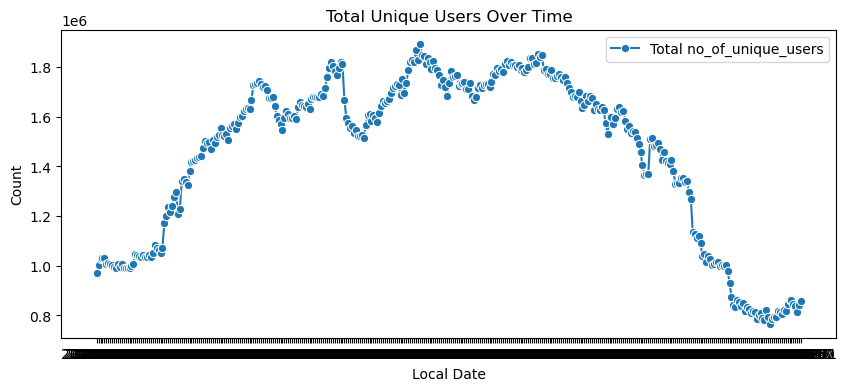

In [24]:
# Plot 2: total_no_of_points and total_no_of_unique_users
plt.figure(figsize=(10, 4))
sns.lineplot(data=aggregated_df, x='local_date', y='total_no_of_unique_users', marker='o', label='Total no_of_unique_users')
plt.title('Total Unique Users Over Time')
plt.xlabel('Local Date')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.show()

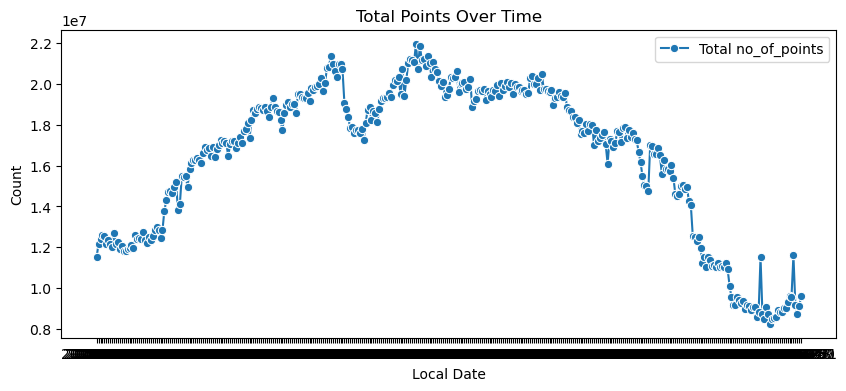

In [25]:
# Plot 2: total_no_of_points and total_no_of_unique_users
plt.figure(figsize=(10, 4))
sns.lineplot(data=aggregated_df, x='local_date', y='total_no_of_points', marker='o', label='Total no_of_points')
plt.title('Total Points Over Time')
plt.xlabel('Local Date')
plt.ylabel('Count')
plt.legend()
plt.grid(False)
plt.show()

## Export 

In [26]:
# combined_df_10['no_of_points'].sum()/126379332

In [27]:
combined_df_10

,no_of_points,no_of_unique_users,grt,local_date,geohash_3
0,10638,1098,2,20190813,ttk
1,64606,10375,1,20190813,ttn
2,12676,994,6,20190813,teh
3,68419,6055,6,20190806,ttm
4,6817,728,7,20190813,tg4
...,...,...,...,...,...
535092,66,11,1,20191011,tf1
535104,44,12,2,20191110,w5f
535129,111,12,3,20191026,tdk
535138,37,11,0,20191022,tf1


In [28]:
# Function to calculate local_time based on grt
def calculate_local_time(local_date, grt):
    start_hour = grt * 3
    end_hour = start_hour + 3
    return f"{str(local_date)} {str(start_hour).zfill(2)}:00:00 - {str(end_hour).zfill(2)}:00:00"

In [29]:
combined_df_10.loc[:, 'local_time'] = combined_df_10.apply(lambda row: calculate_local_time(row['local_date'], row['grt']), axis=1)
combined_df_10 = combined_df_10.drop(columns=['grt'])

combined_df_10

/tmp/ipykernel_72/2217125973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_10.loc[:, 'local_time'] = combined_df_10.apply(lambda row: calculate_local_time(row['local_date'], row['grt']), axis=1)


,no_of_points,no_of_unique_users,local_date,geohash_3,local_time
0,10638,1098,20190813,ttk,20190813 06:00:00 - 09:00:00
1,64606,10375,20190813,ttn,20190813 03:00:00 - 06:00:00
2,12676,994,20190813,teh,20190813 18:00:00 - 21:00:00
3,68419,6055,20190806,ttm,20190806 18:00:00 - 21:00:00
4,6817,728,20190813,tg4,20190813 21:00:00 - 24:00:00
...,...,...,...,...,...
535092,66,11,20191011,tf1,20191011 03:00:00 - 06:00:00
535104,44,12,20191110,w5f,20191110 06:00:00 - 09:00:00
535129,111,12,20191026,tdk,20191026 09:00:00 - 12:00:00
535138,37,11,20191022,tf1,20191022 00:00:00 - 03:00:00


In [30]:
# Save the combined DataFrame to a new CSV file
folder_path = '/home/jovyan/Data/3h_pd3/Clean/'
combined_df_10.to_csv(folder_path + 'pd_3h_gh3_in_2019.csv', index=False)

# Delete Below? 

# February

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200201', '%Y%m%d') AND date_parse('20200228', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_feb.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# March

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200301', '%Y%m%d') AND date_parse('20200331', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_mar.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)

# April

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200401', '%Y%m%d') AND date_parse('20200430', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_apr.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# May

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200501', '%Y%m%d') AND date_parse('20200531', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_may.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# Jun

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200601', '%Y%m%d') AND date_parse('20200630', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_jun.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)



# July

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200701', '%Y%m%d') AND date_parse('20200731', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_jul.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# August

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200801', '%Y%m%d') AND date_parse('20200831', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_aug.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)



# September

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20200901', '%Y%m%d') AND date_parse('20200930', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_set.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# October

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20201001', '%Y%m%d') AND date_parse('20201031', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_oct.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# November

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20201101', '%Y%m%d') AND date_parse('20201130', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_nov.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)


# December

In [ ]:
# Construct the SQL query
query = f"""
SELECT 
    COUNT(*) AS no_of_points,
    COUNT(DISTINCT(cuebiq_id)) AS no_of_unique_users,
    grt,
    day,
    month,
    geohash5
FROM
(SELECT 
    cuebiq_id,
    event_zoned_datetime,
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  hour,
    extract(DAY FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  day,
    extract(MONTH FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))  month,
    geohash_encode(lat, lng, 5) AS geohash5, 
    extract(HOUR FROM date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))/3  grt
FROM {pe_dl_table}
WHERE 
    country_code = '{country_code}' 
    AND event_zoned_datetime IS NOT NULL
    AND TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s')) IS NOT NULL
    AND DATE(TRY(date_parse(substr(event_zoned_datetime, 1, 19), '%Y-%m-%dT%H:%i:%s'))) BETWEEN date_parse('20201201', '%Y%m%d') AND date_parse('20201231', '%Y%m%d') 
)
GROUP BY grt, day, month, geohash5
"""

pe_dl_table_gen = sql_engine.read_sql(query)
fileName = "{}{}_daily_agg5_hour_dec.csv".format(pathFolder,country_code)
pe_dl_table_gen.sort_values(['grt','day'], inplace=True)
pe_dl_table_gen.to_csv(fileName,  sep=',', index=False)
kanonimization (fileName,popDensity_threshold)

